In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
%matplotlib notebook
sns.set_style("whitegrid")

In [30]:
color_map = sns.color_palette("colorblind")

In [4]:
# (x, y, choice)
data = [(1, 1, 1),
        (0, 0, 1),
        (2, 2, 2),
        (1, 0, 2),
        (3, 3, 3),
        (2, 0, 3),
        (4, 3, 3),
        (2, -1, 2),
        (4, 4, 2),
        (3, -1, 3),
       ]
index = pd.MultiIndex.from_product(([1,2,3,4,5], ["Agent 1", "Agent 2"]), names=["Time", "ID"])
display(index)
df = pd.DataFrame(data=data, index=index, columns=["X", "Y", "Choice"])
display(df)

MultiIndex(levels=[[1, 2, 3, 4, 5], ['Agent 1', 'Agent 2']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3, 4, 4], [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]],
           names=['Time', 'ID'])

X  Y  Choice
Time ID                   
1    Agent 1  1  1       1
     Agent 2  0  0       1
2    Agent 1  2  2       2
     Agent 2  1  0       2
3    Agent 1  3  3       3
     Agent 2  2  0       3
4    Agent 1  4  3       3
     Agent 2  2 -1       2
5    Agent 1  4  4       2
     Agent 2  3 -1       3

<IPython.core.display.Javascript object>


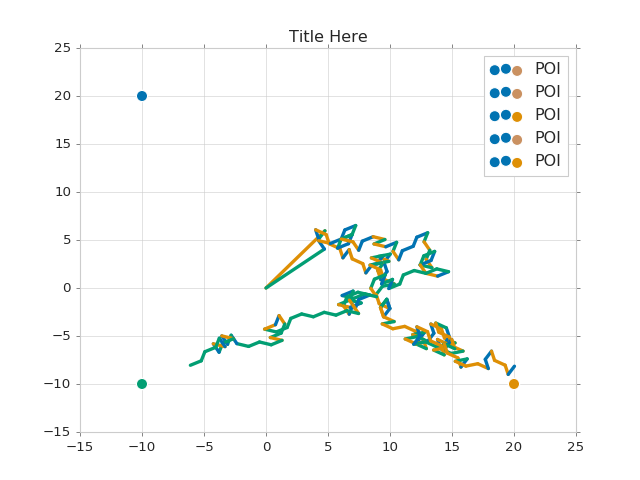

In [42]:
fig, ax = plt.subplots()
    

ax.set_title("Title Here")


# Generate Agent Paths

In [43]:
# See SO post https://stackoverflow.com/questions/17240694/python-how-to-plot-one-line-in-different-colors

df = pd.read_hdf("Hierarchy_vs_G_Experiments.h5", key="Square_POI_Test/agents_2/q/Agent_Positions")
for a in ('Agent 1', 'Agent 2'):
    agent = df.xs(a, level='ID')
    series = list(agent.itertuples())
    for row_i, row_ii in zip(series[:-1], series[1:]):
        x = (row_i.X, row_ii.X)
        y = (row_i.Y, row_ii.Y)
        ax.plot(x, y, color=color_map[int(row_i.Choices)], lw=3)


# POI Placement

In [48]:
poi_df = pd.read_hdf("Hierarchy_vs_G_Experiments.h5", key="Square_POI_Test/agents_2/q/POI_Positions")

colors = []
for t in poi_df.Type:
    colors.append(color_map[int(t)])

ax.scatter(poi_df.X, poi_df.Y, c=colors, s=100, label="POI")
ax.legend(loc='best')

TypeError: 'ListedColormap' object does not support indexing